In [10]:
from IPython.display import Image, clear_output
!pip install roboflow
clear_output()

In [14]:
from roboflow import Roboflow
rf = Roboflow(api_key="rk0O6etvu5xsNna4hJMK", model_format="yolov8")
dataset = rf.workspace("roboflow-100").project("corrosion-bi3q3").version("1").download(location="/content/my-datasets")

loading Roboflow workspace...
loading Roboflow project...


In [13]:
!pip install ultralytics -q


In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [15]:
from ultralytics import YOLO
import os

# Kaggle-specific optimizations
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"  # Better error tracking
os.environ["TMPDIR"] = "/kaggle/temp"  # Use Kaggle's temp space

# Load model (nano for speed, small for better accuracy)
model = YOLO("yolov8s.pt")  # Pre-download to /kaggle/input

# Kaggle-optimized training
results = model.train(
    # Essential params
    data="/content/my-datasets/data.yaml",
    epochs=75,
    imgsz=896,  # Balanced resolution (fits Kaggle RAM)
    batch=12,  # Max for P100 (16 may OOM)
    workers=2,  # Kaggle limits CPU threads
    
    # Speed-optimized augmentations
    hsv_h=0.015,
    hsv_s=0.6,
    hsv_v=0.4,
    degrees=10.0,
    translate=0.1,
    mosaic=0.75,  # Partial mosaic for speed
    mixup=0.15,
    copy_paste=0.1,
    
    # Kaggle-specific optimizations
    device=0,  # Single GPU in Kaggle
    exist_ok=True,  # Overwrite existing
    pretrained=True,
    amp=True,  # Automatic Mixed Precision (20% speed boost)
    patience=20,  # Early stopping
    
    # Resource management
    save_period=5,  # Save every 5 epochs to avoid disk full
    cache="ram",  # Cache dataset if <12GB RAM usage
    single_cls=False,  # Set True if single-class
    
    # Learning params
    lr0=0.001,
    lrf=0.01,
    optimizer="AdamW",
    cos_lr=True,
    
    # Output
    name="kaggle_train_v1",
    verbose=True
)

# Validate and export
_ = model.val()
model.export(format="onnx")  # ONNX uses less Kaggle disk than PyTorch

Ultralytics 8.3.102 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/my-datasets/data.yaml, epochs=75, time=None, patience=20, batch=12, imgsz=896, save=True, save_period=5, cache=ram, device=0, workers=2, project=None, name=kaggle_train_v1, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning /content/my-datasets/train/labels.cache... 840 images, 37 backgrounds, 0 corrupt: 100%|██████████| 840/840 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (1.9GB RAM): 100%|██████████| 840/840 [00:01<00:00, 436.13it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/my-datasets/valid/labels.cache... 304 images, 13 backgrounds, 0 corrupt: 100%|██████████| 304/304 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.7GB RAM): 100%|██████████| 304/304 [00:01<00:00, 227.88it/s]


Plotting labels to runs/detect/kaggle_train_v1/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 896 train, 896 val
Using 2 dataloader workers
Logging results to runs/detect/kaggle_train_v1
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      6.47G      1.862      2.963      1.404         36        896: 100%|██████████| 70/70 [00:29<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.541      0.346       0.36        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75       6.5G      1.576      1.338      1.241         28        896: 100%|██████████| 70/70 [00:29<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]

                   all        304       1282      0.606      0.489       0.53      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75       6.5G      1.533      1.209      1.198         50        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.539      0.456      0.484      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75       6.5G      1.499      1.136      1.193         58        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.845      0.492      0.552      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75       6.5G      1.468      1.093      1.187         31        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.863      0.563      0.604      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75       6.5G      1.425      1.062      1.162         46        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282       0.79      0.591      0.609      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75       6.5G      1.428      1.039      1.156         46        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.872      0.586       0.62      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75       6.5G       1.42     0.9788      1.163         30        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.851      0.574      0.616      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75       6.5G       1.38     0.9532      1.134         51        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]

                   all        304       1282       0.86      0.554      0.597      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75       6.5G      1.342     0.9169      1.118         44        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]

                   all        304       1282      0.839      0.601      0.638       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75       6.5G      1.339     0.9169      1.118         40        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]


                   all        304       1282      0.811      0.596       0.63      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75       6.5G      1.306     0.8881      1.092         34        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]

                   all        304       1282      0.817      0.607      0.627      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75       6.5G      1.314      0.881      1.103         39        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]

                   all        304       1282      0.914      0.616      0.646      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75       6.5G      1.282     0.8343      1.081         64        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.905      0.585      0.624      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75       6.5G       1.29     0.8303      1.088         43        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.854      0.608      0.635      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75       6.5G      1.304     0.8267      1.086         58        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]


                   all        304       1282      0.887      0.609      0.651      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75       6.5G       1.26     0.8176      1.065         51        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.899      0.627       0.66      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75       6.5G      1.232      0.806      1.063         39        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        304       1282      0.937      0.599      0.658      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75       6.5G      1.246     0.7988      1.072         38        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        304       1282      0.907      0.622      0.655      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75       6.5G      1.259     0.7835      1.071         57        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.913      0.634      0.672      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75       6.5G      1.232     0.7676      1.061         32        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        304       1282      0.893      0.624       0.67      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75       6.5G      1.213     0.7532       1.06         54        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]


                   all        304       1282      0.894      0.645      0.666      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75       6.5G        1.2     0.7488      1.065         63        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.912      0.647      0.682      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75       6.5G      1.192     0.7242      1.045         43        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.893      0.631      0.662      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75       6.5G      1.194     0.7564      1.046         51        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.874       0.64      0.656       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75       6.5G      1.194      0.747      1.051         39        896: 100%|██████████| 70/70 [00:29<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]

                   all        304       1282      0.928      0.623      0.668      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75       6.5G      1.203       0.75       1.07         48        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        304       1282      0.904      0.632       0.68      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75       6.5G      1.198      0.736      1.045         40        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.909      0.642      0.685      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75       6.5G      1.172     0.6974      1.039         47        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]

                   all        304       1282      0.925      0.644      0.684      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75       6.5G       1.14     0.6833      1.025         56        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.934      0.654      0.691      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75       6.5G       1.18     0.7179      1.051         33        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.921      0.649      0.682      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75       6.5G      1.182     0.7055      1.029         50        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]

                   all        304       1282      0.921      0.657      0.683      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75       6.5G      1.109     0.6749      1.012         26        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.915      0.656      0.693      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75       6.5G       1.14     0.6771      1.016         25        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]

                   all        304       1282      0.915      0.648      0.688      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75       6.5G      1.137     0.6722      1.032         40        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]

                   all        304       1282      0.936      0.659      0.701      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75       6.5G      1.146     0.6835      1.034         32        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]

                   all        304       1282       0.88      0.654      0.686      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75       6.5G      1.103     0.6505      1.009         41        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.921      0.653      0.694      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75       6.5G      1.126     0.6673       1.02         36        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.902      0.662      0.698      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75       6.5G      1.091     0.6315     0.9912         42        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]

                   all        304       1282      0.896      0.659        0.7      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75       6.5G      1.086     0.6254      0.994         42        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.939      0.655      0.705      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75       6.5G      1.101     0.6458      1.004         51        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]


                   all        304       1282      0.953      0.655      0.699      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75       6.5G      1.074     0.6404      1.002         51        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        304       1282      0.887      0.661      0.699      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75       6.5G      1.084     0.6401      1.005         53        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]

                   all        304       1282      0.941      0.654      0.708      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75       6.5G      1.093     0.6475     0.9991         52        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.919      0.658      0.709      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75       6.5G      1.076     0.6308     0.9886         39        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]


                   all        304       1282      0.917      0.662       0.71      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75       6.5G      1.085     0.6178      1.001         54        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.926      0.666      0.712      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75       6.5G      1.045     0.6055     0.9787         43        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]

                   all        304       1282      0.909      0.665      0.705      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75       6.5G      1.051     0.6083     0.9876         83        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        304       1282      0.909      0.668      0.711      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75       6.5G      1.027     0.5995     0.9813         34        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]

                   all        304       1282      0.897      0.674      0.712      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75       6.5G      1.033     0.5821     0.9785         53        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]


                   all        304       1282      0.922      0.672      0.714      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75       6.5G      1.007     0.5747     0.9751         55        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.932      0.667      0.714      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75       6.5G      1.019     0.5772     0.9744         32        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        304       1282      0.918      0.669      0.717      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75       6.5G      1.009     0.5674     0.9703         39        896: 100%|██████████| 70/70 [00:28<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.917      0.674      0.716      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75       6.5G          1     0.5621     0.9693         42        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.923      0.671      0.716      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75       6.5G     0.9919     0.5492     0.9633         45        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.916      0.673       0.71      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75       6.5G     0.9792      0.564     0.9603         64        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.924      0.668      0.713      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75       6.5G     0.9964     0.5483     0.9638         50        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]

                   all        304       1282      0.902      0.675      0.715      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75       6.5G     0.9822     0.5494     0.9601         61        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]

                   all        304       1282      0.935       0.67      0.722      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75       6.5G     0.9479     0.5295     0.9518         43        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.919      0.675       0.72      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75       6.5G      1.008      0.562     0.9673         52        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.925      0.677       0.72      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75       6.5G      0.973     0.5331     0.9598         49        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.946      0.668      0.718      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75       6.5G     0.9778     0.5377      0.963         43        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.928      0.677      0.721      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75       6.5G     0.9857      0.537     0.9594         62        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.919      0.682      0.724      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75       6.5G     0.9129     0.5176     0.9354         39        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.941      0.677      0.721      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75       6.5G      0.971     0.5322     0.9578         36        896: 100%|██████████| 70/70 [00:29<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]

                   all        304       1282      0.951      0.679      0.725       0.45


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75       6.5G      1.121     0.5711     0.9697         30        896: 100%|██████████| 70/70 [00:29<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.912      0.678      0.717      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75       6.5G      1.114     0.5565     0.9613         47        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]

                   all        304       1282      0.951      0.668       0.72      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75       6.5G      1.121      0.558     0.9705         44        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.925      0.679      0.721      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75       6.5G      1.114      0.553     0.9603         49        896: 100%|██████████| 70/70 [00:28<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.924      0.682      0.722      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75       6.5G      1.111     0.5589     0.9701         27        896: 100%|██████████| 70/70 [00:28<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]


                   all        304       1282      0.923      0.685      0.725      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75       6.5G      1.097     0.5462     0.9628         39        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]

                   all        304       1282      0.924      0.682      0.723      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75       6.5G       1.08     0.5477     0.9508         41        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        304       1282      0.916       0.68      0.722      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75       6.5G      1.087     0.5446     0.9604         37        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]

                   all        304       1282      0.921      0.682      0.724      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75       6.5G      1.088       0.54     0.9588         32        896: 100%|██████████| 70/70 [00:28<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]

                   all        304       1282      0.924      0.685      0.725      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75       6.5G      1.093     0.5392      0.962         56        896: 100%|██████████| 70/70 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]


                   all        304       1282      0.933       0.68      0.724      0.458

75 epochs completed in 0.696 hours.
Optimizer stripped from runs/detect/kaggle_train_v1/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/kaggle_train_v1/weights/best.pt, 22.6MB

Validating runs/detect/kaggle_train_v1/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]


                   all        304       1282      0.935       0.68      0.724      0.458
              Slippage         30         98      0.979          1      0.993      0.723
             corrosion         98        317      0.927      0.517      0.582      0.344
                 crack        186        867        0.9      0.521      0.597      0.308


invalid value encountered in less
invalid value encountered in less


Speed: 0.4ms preprocess, 9.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/kaggle_train_v1
Ultralytics 8.3.102 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/my-datasets/valid/labels.cache... 304 images, 13 backgrounds, 0 corrupt: 100%|██████████| 304/304 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.7GB RAM): 100%|██████████| 304/304 [00:00<00:00, 444.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.01it/s]


                   all        304       1282      0.934      0.679      0.723      0.457
              Slippage         30         98      0.978          1      0.993      0.716
             corrosion         98        317      0.925      0.514       0.58      0.345
                 crack        186        867        0.9      0.522      0.595      0.309


invalid value encountered in less
invalid value encountered in less


Speed: 1.7ms preprocess, 9.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/kaggle_train_v1
Ultralytics 8.3.102 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/kaggle_train_v1/weights/best.pt' with input shape (1, 3, 896, 896) BCHW and output shape(s) (1, 7, 16464) (21.5 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 185.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 250.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 303.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.2s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.

'runs/detect/kaggle_train_v1/weights/best.onnx'

WARNING ⚠️ 'save_hybrid=True' will append ground truth to predictions for autolabelling.
WARNING ⚠️ 'save_hybrid=True' will cause incorrect mAP.

Ultralytics 8.3.102 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/my-datasets/test/labels... 105 images, 5 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<00:00, 1128.38it/s]

val: New cache created: /content/my-datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


                   all        105        422          1          1      0.995      0.995
             corrosion         58        164          1          1      0.995      0.995
                 crack         90        258          1          1      0.995      0.995


invalid value encountered in less
invalid value encountered in less


Speed: 5.7ms preprocess, 9.2ms inference, 0.0ms loss, 4.1ms postprocess per image
Saving runs/detect/yolov8_test_results/predictions.json...
Results saved to runs/detect/yolov8_test_results

Test Set Performance:
Precision: 1.0000
Recall: 1.0000
mAP@0.5: 0.9950
mAP@0.5:0.95: 0.9950


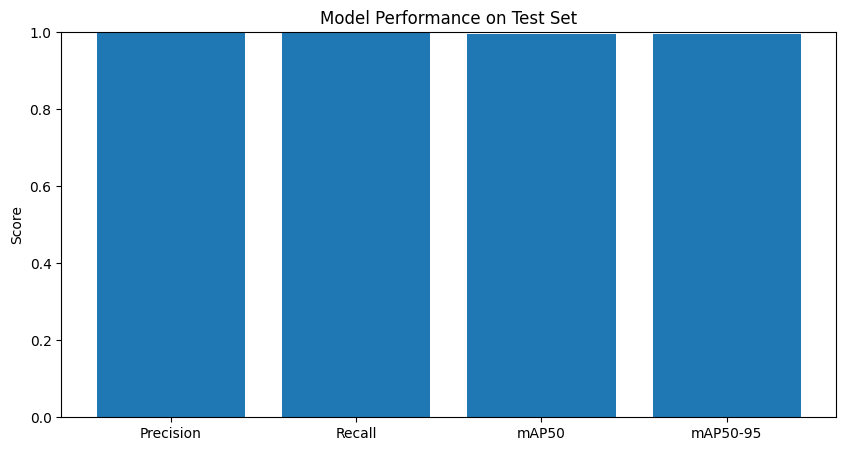


Confusion matrix saved to: runs/detect/yolov8_test_results/confusion_matrix.png
F1 curve saved to: runs/detect/yolov8_test_results/F1_curve.png


In [16]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import os

# 1. Load your trained model
model = YOLO('/kaggle/working/runs/detect/kaggle_train_v1/weights/best.pt')  # Replace with your model path

# 2. Validate on test set
results = model.val(
    data='/content/my-datasets/data.yaml',
    split='test',  # Ensure you have 'test' set in your data.yaml
    batch=16,
    imgsz=896,     # Match your training size
    conf=0.25,     # Confidence threshold
    iou=0.6,       # IoU threshold
    device='cuda', # or 'cpu'
    name='yolov8_test_results',
    save_json=True, # For exporting metrics
    save_hybrid=True,
    plots=True      # Generate plots
)

# 3. Extract key metrics
metrics = {
    'Precision': results.box.mp,
    'Recall': results.box.mr,
    'mAP50': results.box.map50,
    'mAP50-95': results.box.map,
    'Class-wise AP': results.box.maps.tolist()  # AP per class
}

# 4. Print metrics
print("\nTest Set Performance:")
print(f"Precision: {metrics['Precision']:.4f}")
print(f"Recall: {metrics['Recall']:.4f}")
print(f"mAP@0.5: {metrics['mAP50']:.4f}")
print(f"mAP@0.5:0.95: {metrics['mAP50-95']:.4f}")

# 5. Save metrics to CSV
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv('test_metrics.csv', index=False)

# 6. Visualize metrics
plt.figure(figsize=(10, 5))
plt.bar(['Precision', 'Recall', 'mAP50', 'mAP50-95'],
        [metrics['Precision'], metrics['Recall'], metrics['mAP50'], metrics['mAP50-95']])
plt.title('Model Performance on Test Set')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.savefig('test_metrics_plot.png')
plt.show()

# 7. Show confusion matrix (automatically saved during validation)
confusion_matrix_path = os.path.join('runs/detect/yolov8_test_results', 'confusion_matrix.png')
print(f"\nConfusion matrix saved to: {confusion_matrix_path}")

# 8. Show F1 curve (automatically saved during validation)
f1_curve_path = os.path.join('runs/detect/yolov8_test_results', 'F1_curve.png')
print(f"F1 curve saved to: {f1_curve_path}")